In [ ]:
# #counter In Collections
# from collections import Counter

# labels = ['yes', 'no', 'yes', 'no', 'yes', 'no']

# counts = Counter(labels)

# print(counts)

Counter({'yes': 3, 'no': 3})


In [5]:
from collections import  Counter
import math

def entropy(data) :
    
    labels = [label for _, label in data]
    
    total = len(labels)
    
    counts = Counter(labels)
    
    ent = 0
    for count in counts.values():
        
        p = count / total
        
        ent = ent - p*(math.log2(p))
        
        return ent

In [6]:
def gini_index(data):
    
    labels = [label for _, label in data]
    total = len(labels)
    counts = Counter(labels)
    gini = 1
    
    for count in counts.values():
        
        p = count / total
        
        gini = gini - (p ** 2)
        
    return gini

In [ ]:
dataset = [
    ['Young', 'Yes'],
    ['Young', 'Yes'],
    ['Old', 'No'],
    ['Old', 'No'],
    ['Young', 'Yes'],
    ['Old', 'No']
]

print("🔹 Entropy الكلي:", entropy(dataset))
print("🔹 Gini Index الكلي:", gini_index(dataset))

🔹 Entropy الكلي: 0.5
🔹 Gini Index الكلي: 0.5


Decision Tree Implementation

In [9]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [10]:
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
             'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True,
              False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
             'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

In [11]:
df = pd.DataFrame(data, columns = data.keys())

In [12]:
df.head()

,Outlook,Temp,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rain,Mild,High,False,Yes
4,Rain,Cool,Normal,False,Yes


In [13]:
df['Play'].value_counts()

Play
Yes    9
No     5
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [ ]:
for column in df.columns :
    
    df[column] = encoder.fit_transform(df[column])

In [17]:
df.head()

,Outlook,Temp,Humidity,Windy,Play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [19]:
x = df.drop(columns = ['Play'], axis = 1)

y= df['Play']

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy')

In [21]:
model.fit(x, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


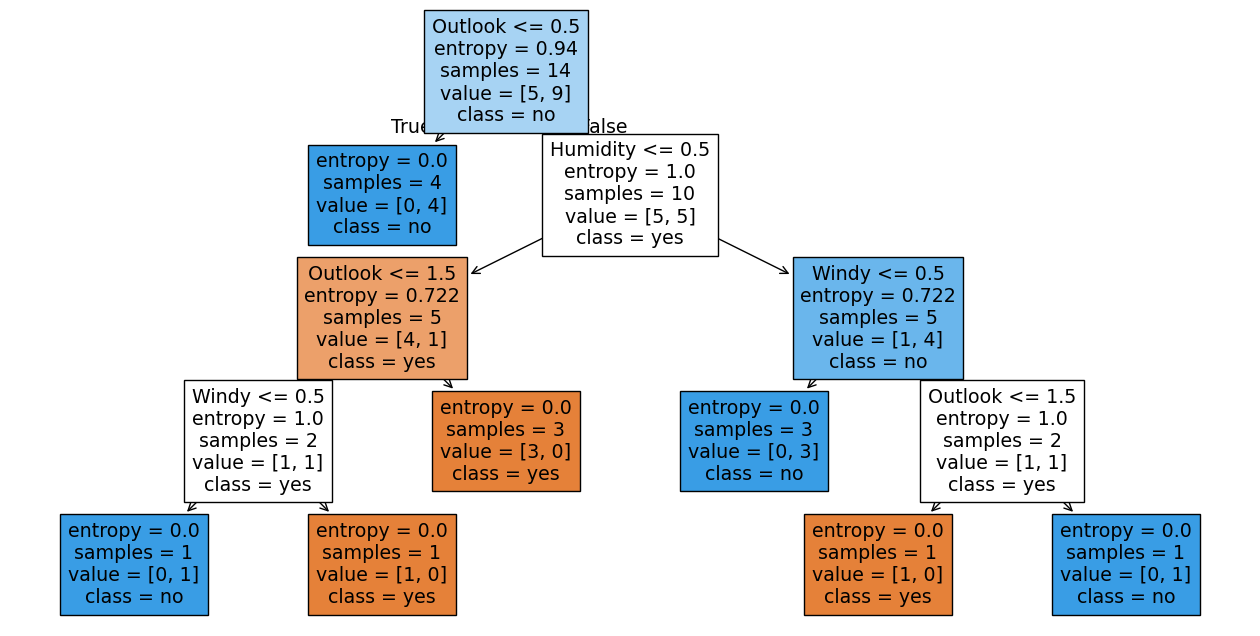

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 8))
tree.plot_tree(model, feature_names = x.columns, class_names = ['yes', 'no'], filled = True)
plt.show()